 <a id="prob"></a>
# <font color = "Purple" > Problem Statement

- HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. 
- To categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

### Below are the steps which we will be basically following:

1. [Step 1: Import all libraries](#1)
1. [Step 2: Reading and Understanding the Data](#2)

1.  [Step 3: Data Inspection](#3)
    - Missing Value check
    - Duplicate check
1. [Step 4: Data Visualization](#4)
    - Barplot
    - Heatmap    
1. [Step 5: Data Preparation](#5) 
   - Rescaling
   - Outlier Analysis and Treatment
1. [Step 6: Hopkins Statistics Test](#6)
   - Hopkins Score Calculation
1. [Step 7: Model Building](#7)
   - K-means Clustering
   - Elbow Curve
   - Silhouette Analysis
   - Hierarchial Clustering
1. [Step 8: Final Analysis](#8)
   - Final Country list Preparation       

<a id="prob"></a>
### <font color = "Purple" > Import all libraries and dependencies for dataframe


In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# import all libraries and dependencies for data visualization
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1) 
sns.set(style='darkgrid')
import matplotlib.ticker as plticker
%matplotlib inline

# import all libraries and dependencies for machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

# import all libraries and dependencies for clustering
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
# Reading the country file on which analysis needs to be done

df_country = pd.read_csv('Country-data.csv')
df_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2000,10.0000,7.5800,44.9000,1610,9.4400,56.2000,5.8200,553
1,Albania,16.6000,28.0000,6.5500,48.6000,9930,4.4900,76.3000,1.6500,4090
2,Algeria,27.3000,38.4000,4.1700,31.4000,12900,16.1000,76.5000,2.8900,4460
3,Angola,119.0000,62.3000,2.8500,42.9000,5900,22.4000,60.1000,6.1600,3530
4,Antigua and Barbuda,10.3000,45.5000,6.0300,58.9000,19100,1.4400,76.8000,2.1300,12200


<a id="prob"></a>
### <font color = "Purple" > Data Inspection


In [3]:
df_country.shape

(167, 10)

In [4]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
df_country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000
mean,38.2701,41.1090,6.8157,46.8902,17144.6886,7.7818,70.5557,2.9480,12964.1557
std,40.3289,27.4120,2.7468,24.2096,19278.0677,10.5707,8.8932,1.5138,18328.7048
min,2.6000,0.1090,1.8100,0.0659,609.0000,-4.2100,32.1000,1.1500,231.0000
25%,8.2500,23.8000,4.9200,30.2000,3355.0000,1.8100,65.3000,1.7950,1330.0000
50%,19.3000,35.0000,6.3200,43.3000,9960.0000,5.3900,73.1000,2.4100,4660.0000
75%,62.1000,51.3500,8.6000,58.7500,22800.0000,10.7500,76.8000,3.8800,14050.0000
max,208.0000,200.0000,17.9000,174.0000,125000.0000,104.0000,82.8000,7.4900,105000.0000


In [6]:
df_country.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [7]:
# Duplicates check

df_country.loc[df_country.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp



<a id="prob"></a>
### <font color = "Purple" >  Data Visualisation

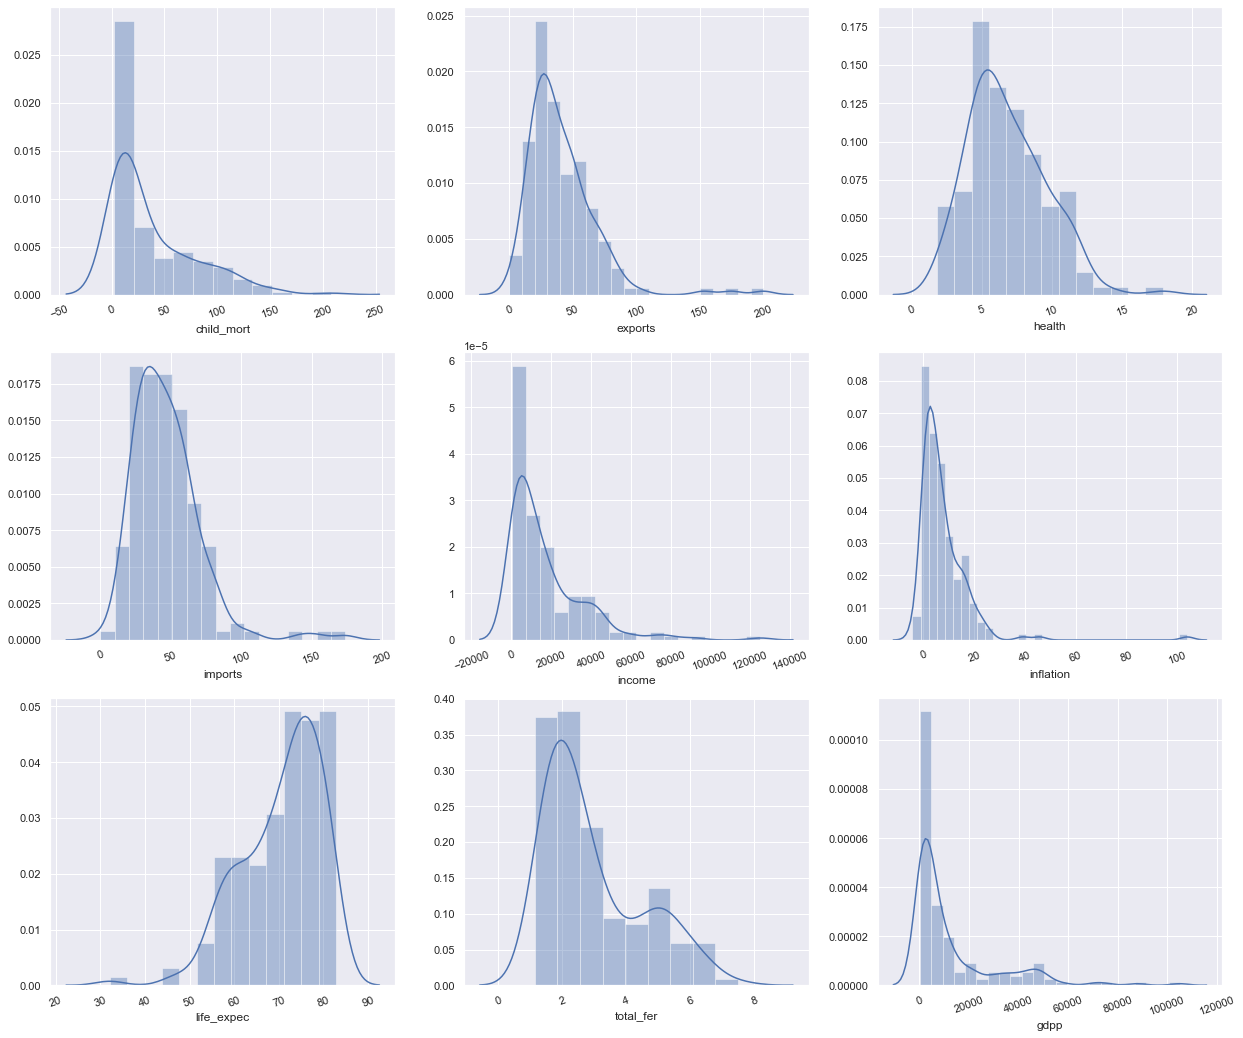

In [8]:
num_df = df_country[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation','life_expec', 'total_fer', 'gdpp']]
plt.figure(figsize=(21, 18))
features = ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
for i in enumerate(features):
    ax = plt.subplot(3, 3, i[0]+1)
    sns.distplot(num_df[i[1]])
    plt.xticks(rotation=20)

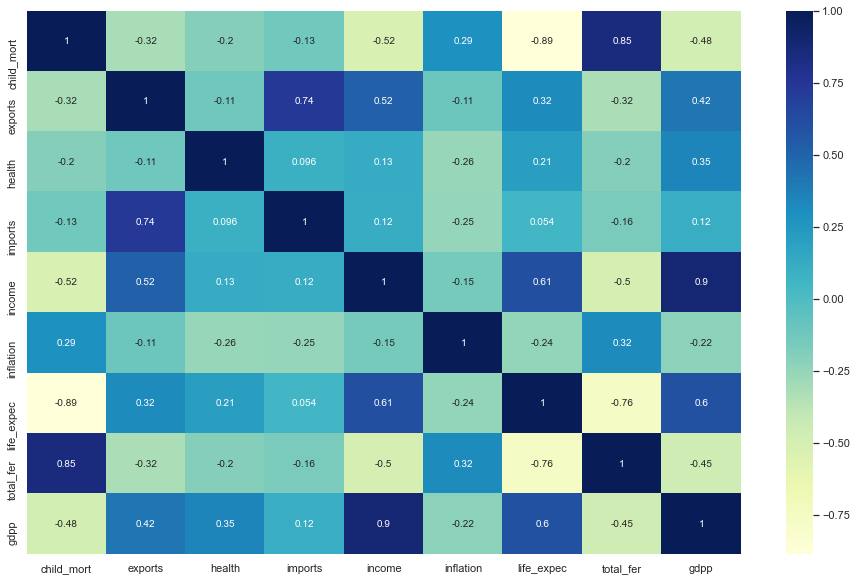

In [9]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_country.corr(), annot = True, cmap="YlGnBu")
plt.savefig('corrplot')
plt.show()

### Inference:

 - gdpp and income are most highly correlated with correlation of 0.9
 - child_mortality and life_expentency are highly correlated with correlation of -0.89
 - child_mortality and total_fertility are highly correlated with correlation of 0.85
 - imports and exports are highly correlated with correlation of 0.74
 - life_expentency and total_fertility are highly correlated with correlation of -0.76 

<a id="prob"></a>
### <font color = "Purple" > Univariate Analysis

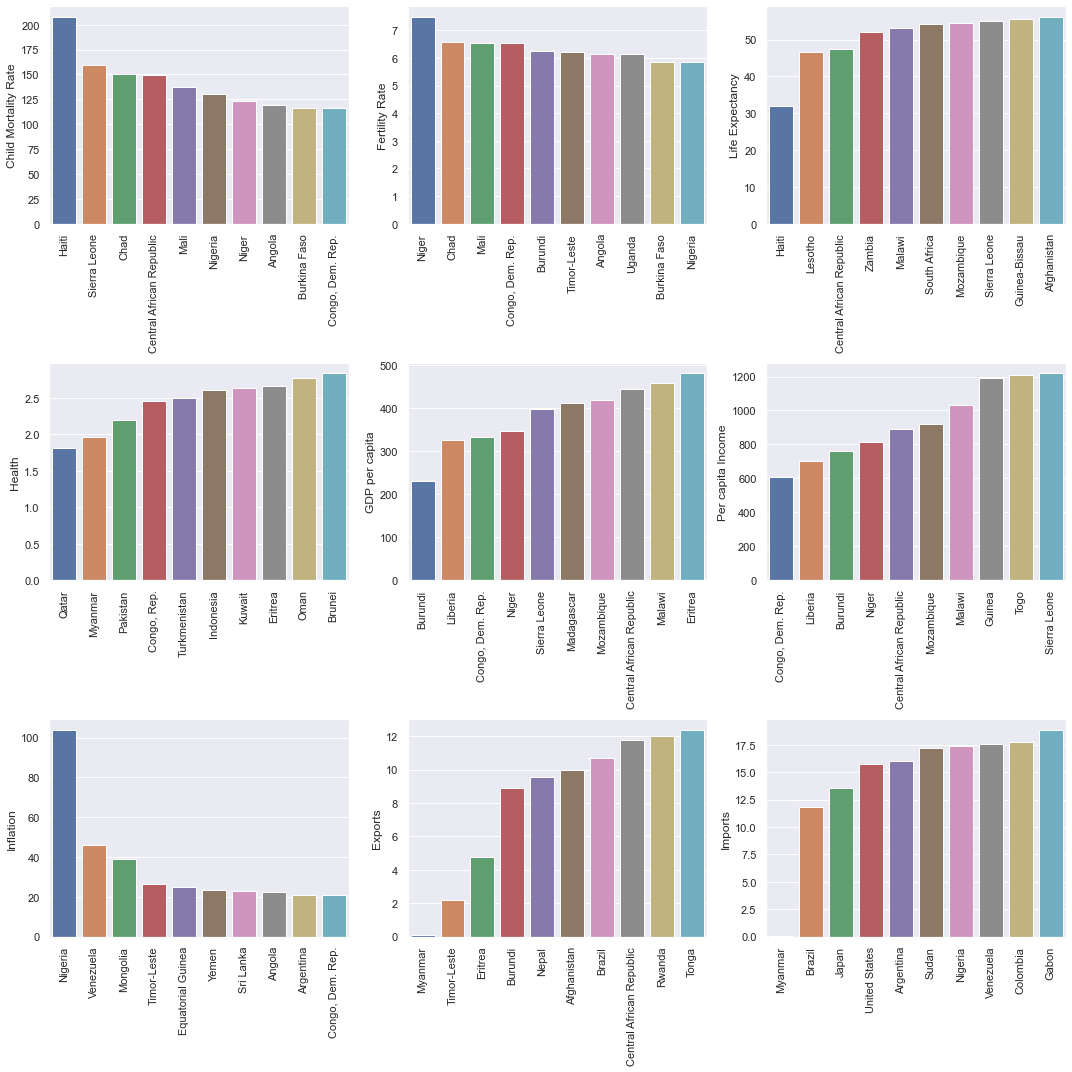

In [10]:
# We will have a look on the lowest 10 countries for each factor.

fig, axs = plt.subplots(3,3,figsize = (15,15))

# Child Mortality Rate : Death of children under 5 years of age per 1000 live births

top10_child_mort = df_country[['country','child_mort']].sort_values('child_mort', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='child_mort', data= top10_child_mort, ax = axs[0,0])
plt1.set(xlabel = '', ylabel= 'Child Mortality Rate')

# Fertility Rate: The number of children that would be born to each woman if the current age-fertility rates remain the same
top10_total_fer = df_country[['country','total_fer']].sort_values('total_fer', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='total_fer', data= top10_total_fer, ax = axs[0,1])
plt1.set(xlabel = '', ylabel= 'Fertility Rate')

# Life Expectancy: The average number of years a new born child would live if the current mortality patterns are to remain same

bottom10_life_expec = df_country[['country','life_expec']].sort_values('life_expec', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='life_expec', data= bottom10_life_expec, ax = axs[0,2])
plt1.set(xlabel = '', ylabel= 'Life Expectancy')

# Health :Total health spending as %age of Total GDP.

bottom10_health = df_country[['country','health']].sort_values('health', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='health', data= bottom10_health, ax = axs[1,0])
plt1.set(xlabel = '', ylabel= 'Health')

# The GDP per capita : Calculated as the Total GDP divided by the total population.

bottom10_gdpp = df_country[['country','gdpp']].sort_values('gdpp', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='gdpp', data= bottom10_gdpp, ax = axs[1,1])
plt1.set(xlabel = '', ylabel= 'GDP per capita')

# Per capita Income : Net income per person

bottom10_income = df_country[['country','income']].sort_values('income', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='income', data= bottom10_income, ax = axs[1,2])
plt1.set(xlabel = '', ylabel= 'Per capita Income')


# Inflation: The measurement of the annual growth rate of the Total GDP

top10_inflation = df_country[['country','inflation']].sort_values('inflation', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='inflation', data= top10_inflation, ax = axs[2,0])
plt1.set(xlabel = '', ylabel= 'Inflation')


# Exports: Exports of goods and services. Given as %age of the Total GDP

bottom10_exports = df_country[['country','exports']].sort_values('exports', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='exports', data= bottom10_exports, ax = axs[2,1])
plt1.set(xlabel = '', ylabel= 'Exports')


# Imports: Imports of goods and services. Given as %age of the Total GDP

bottom10_imports = df_country[['country','imports']].sort_values('imports', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='imports', data= bottom10_imports, ax = axs[2,2])
plt1.set(xlabel = '', ylabel= 'Imports')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)
    
plt.tight_layout()
plt.savefig('eda')
plt.show()
    

In [11]:
#The final matrix would only contain the data columns. Hence let's drop the country column
data=df_country.drop(['country'],axis=1)
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2000,10.0000,7.5800,44.9000,1610,9.4400,56.2000,5.8200,553
1,16.6000,28.0000,6.5500,48.6000,9930,4.4900,76.3000,1.6500,4090
2,27.3000,38.4000,4.1700,31.4000,12900,16.1000,76.5000,2.8900,4460
3,119.0000,62.3000,2.8500,42.9000,5900,22.4000,60.1000,6.1600,3530
4,10.3000,45.5000,6.0300,58.9000,19100,1.4400,76.8000,2.1300,12200


 **Observations**
1. Haiti has highest child mortality rate and least Life expectatncy.
2. Niger has highest Fertility Rate.
3. Eritrea has lowest spending on Health.
4. Burundi has lowest GDP per capita
5. The republic of Congo has lowest Per Capita Income
6. Inflation rates of Nigeria are the highest
7. Myanmar doesn't export or import much(lowest exports and imports)

## Outlier Treatment

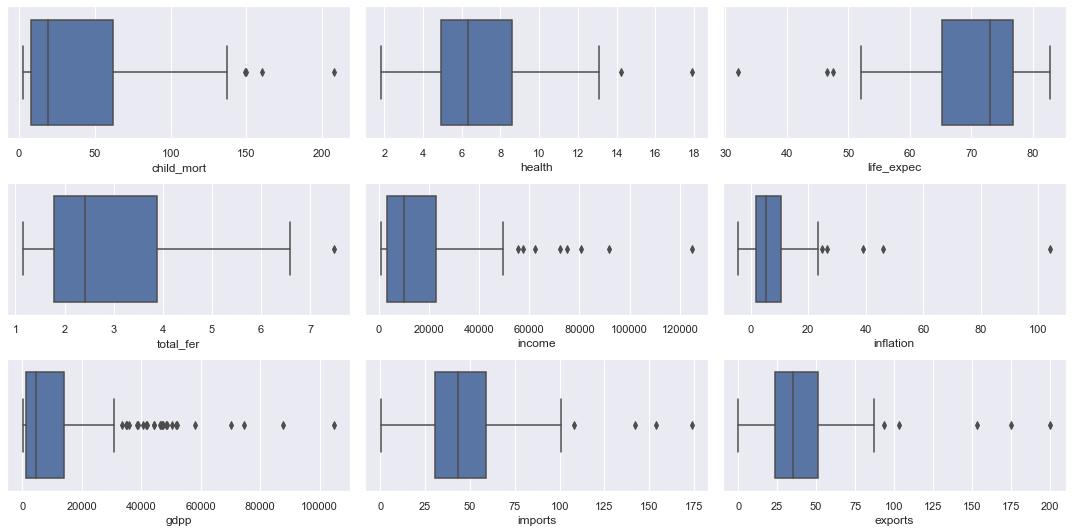

In [12]:
fig, axs = plt.subplots(3,3, figsize = (15,7.5))
plt1 = sns.boxplot(df_country['child_mort'], ax = axs[0,0])
plt2 = sns.boxplot(df_country['health'], ax = axs[0,1])
plt3 = sns.boxplot(df_country['life_expec'], ax = axs[0,2])
plt4 = sns.boxplot(df_country['total_fer'], ax = axs[1,0])
plt5 = sns.boxplot(df_country['income'], ax = axs[1,1])
plt6 = sns.boxplot(df_country['inflation'], ax = axs[1,2])
plt7 = sns.boxplot(df_country['gdpp'], ax = axs[2,0])
plt8 = sns.boxplot(df_country['imports'], ax = axs[2,1])
plt9 = sns.boxplot(df_country['exports'], ax = axs[2,2])


plt.tight_layout()


In [13]:
data_c = ['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']

for i in data_c:
    percentiles = data[i].quantile([0.05, 0.95]).values
    data[i][data[i] <= percentiles[0]] = percentiles[0]
    data[i][data[i] >= percentiles[1]] = percentiles[1]

- We observe the following about the outliers.

- All variables have outliers on the upper side (higher values) except for life_expec which has outliers on the down side (less values) indicating that usually the life expectancy in most countries is above 50 except for 3 countries.

In [14]:
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2000,12.1200,7.5800,44.9000,1610.0000,9.4400,56.2000,5.8200,553.0000
1,16.6000,28.0000,6.5500,48.6000,9930.0000,4.4900,76.3000,1.6500,4090.0000
2,27.3000,38.4000,4.1700,31.4000,12900.0000,16.1000,76.5000,2.8900,4460.0000
3,116.0000,62.3000,2.8500,42.9000,5900.0000,20.8700,60.1000,5.8610,3530.0000
4,10.3000,45.5000,6.0300,58.9000,19100.0000,1.4400,76.8000,2.1300,12200.0000


In [15]:
# Treating (statistical) outliers
grouped_df = df_country.groupby('country')['income'].sum()
grouped_df = grouped_df.reset_index()
grouped_df.head()

,country,income
0,Afghanistan,1610
1,Albania,9930
2,Algeria,12900
3,Angola,5900
4,Antigua and Barbuda,19100


In [16]:
Q1 = grouped_df.income.quantile(0.05)
Q3 = grouped_df.income.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.income >= Q1 - 1.5*IQR) & (grouped_df.income <= Q3 + 1.5*IQR)]

<a id="prob"></a>
### <font color = "Purple" > Data Preparation

In [17]:
# Converting exports,imports and health spending percentages to absolute values.

df_country['exports'] = df_country['exports'] * df_country['gdpp']/100
df_country['imports'] = df_country['imports'] * df_country['gdpp']/100
df_country['health'] = df_country['health'] * df_country['gdpp']/100

In [18]:
df_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2000,55.3000,41.9174,248.2970,1610,9.4400,56.2000,5.8200,553
1,Albania,16.6000,1145.2000,267.8950,1987.7400,9930,4.4900,76.3000,1.6500,4090
2,Algeria,27.3000,1712.6400,185.9820,1400.4400,12900,16.1000,76.5000,2.8900,4460
3,Angola,119.0000,2199.1900,100.6050,1514.3700,5900,22.4000,60.1000,6.1600,3530
4,Antigua and Barbuda,10.3000,5551.0000,735.6600,7185.8000,19100,1.4400,76.8000,2.1300,12200


In [19]:
# Dropping Country field as final dataframe will only contain data columns

df_country_drop = df_country.copy()
country = df_country_drop.pop('country')

In [20]:
df_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2000,55.3000,41.9174,248.2970,1610,9.4400,56.2000,5.8200,553
1,Albania,16.6000,1145.2000,267.8950,1987.7400,9930,4.4900,76.3000,1.6500,4090
2,Algeria,27.3000,1712.6400,185.9820,1400.4400,12900,16.1000,76.5000,2.8900,4460
3,Angola,119.0000,2199.1900,100.6050,1514.3700,5900,22.4000,60.1000,6.1600,3530
4,Antigua and Barbuda,10.3000,5551.0000,735.6600,7185.8000,19100,1.4400,76.8000,2.1300,12200


In [21]:
df_country_drop.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2000,55.3000,41.9174,248.2970,1610,9.4400,56.2000,5.8200,553
1,16.6000,1145.2000,267.8950,1987.7400,9930,4.4900,76.3000,1.6500,4090
2,27.3000,1712.6400,185.9820,1400.4400,12900,16.1000,76.5000,2.8900,4460
3,119.0000,2199.1900,100.6050,1514.3700,5900,22.4000,60.1000,6.1600,3530
4,10.3000,5551.0000,735.6600,7185.8000,19100,1.4400,76.8000,2.1300,12200


<a id="prob"></a>
### <font color = "Purple" > Rescaling the Features

Most software packages use SVD to compute the principal components and assume that the data is scaled and centred, so it is important to do standardisation/normalisation. There are two common ways of rescaling:

Min-Max scaling
Standardisation (mean-0, sigma-1)
Here, we will use Standardisation Scaling.

In [22]:
# Standarisation technique for scaling

# instantiate 
scaler = StandardScaler()

# fit_transform
scaled_data = pd.DataFrame(scaler.fit_transform(df_country_drop))

scaled_data.columns = df_country.columns[df_country.dtypes != 'object']

scaled_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.2915,-0.4110,-0.5650,-0.4323,-0.8082,0.1573,-1.6191,1.9029,-0.6792
1,-0.5389,-0.3502,-0.4392,-0.3137,-0.3754,-0.3123,0.6479,-0.8600,-0.4856
2,-0.2728,-0.3185,-0.4848,-0.3537,-0.2208,0.7893,0.6704,-0.0384,-0.4654
3,2.0078,-0.2914,-0.5324,-0.3460,-0.5850,1.3871,-1.1792,2.1282,-0.5163
4,-0.6956,-0.1043,-0.1788,0.0407,0.1017,-0.6017,0.7043,-0.5419,-0.0418


## Step 5: Hopkins

In [23]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [30]:
#Using the Hopkins Statistic function by passing the above dataframe as a parameter
hopkins(scaled_data)

0.9337989815779765

## Finding optimal number of clusters

### SSD

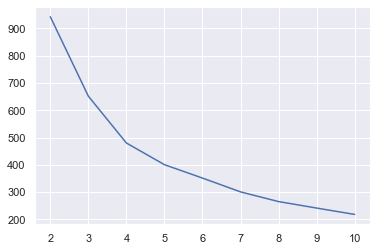

In [31]:
ssd = []
for k in range(2,11):
    kmean = KMeans(n_clusters = k).fit(scaled_data)
    ssd.append([k, kmean.inertia_])

ssd = pd.DataFrame(ssd)
plt.plot(ssd[0], ssd[1])

### Silhouette analysis

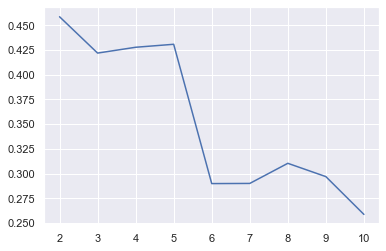

In [61]:
from sklearn.metrics import silhouette_score
# We looks at the maximum value

ss = []
for k in range(2,11):
    kmeans = KMeans(n_clusters = k).fit(scaled_data)
    ss.append([k, silhouette_score(scaled_data, kmeans.labels_)])
    
sil = pd.DataFrame(ss)
plt.plot(sil[0],sil[1])

In [32]:
 
range_n_clusters = [2, 3, 4, 5, 6, 7, 8,9,10,11]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50, random_state=50)
    kmeans.fit(scaled_data)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.45863306035476264
For n_clusters=3, the silhouette score is 0.4218615812599681
For n_clusters=4, the silhouette score is 0.42914711278370843
For n_clusters=5, the silhouette score is 0.4324001169216119
For n_clusters=6, the silhouette score is 0.29881237591329407
For n_clusters=7, the silhouette score is 0.3068220382518731
For n_clusters=8, the silhouette score is 0.3021513094664446
For n_clusters=9, the silhouette score is 0.2632923019143254
For n_clusters=10, the silhouette score is 0.3170209839463571
For n_clusters=11, the silhouette score is 0.2881456800892578


<a id="prob"></a>
#### <font color = "Purple" > Final KMeans with K==3

In [33]:
kmeans = KMeans(n_clusters =3, random_state = 0)
kmeans.fit(scaled_data)

KMeans(n_clusters=3, random_state=0)

In [34]:
kmeans.labels_

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 2,
       1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 2,
       0, 2, 1, 2, 2, 2, 0, 1, 2, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       1, 1, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 1, 2, 2, 0, 0, 2, 1, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0])

In [35]:
# Now, we will assign these labels to the orignial dataframe.
df_country['cluster_id'] = kmeans.labels_

In [36]:
df_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2000,55.3000,41.9174,248.2970,1610,9.4400,56.2000,5.8200,553,0
1,Albania,16.6000,1145.2000,267.8950,1987.7400,9930,4.4900,76.3000,1.6500,4090,2
2,Algeria,27.3000,1712.6400,185.9820,1400.4400,12900,16.1000,76.5000,2.8900,4460,2
3,Angola,119.0000,2199.1900,100.6050,1514.3700,5900,22.4000,60.1000,6.1600,3530,0
4,Antigua and Barbuda,10.3000,5551.0000,735.6600,7185.8000,19100,1.4400,76.8000,2.1300,12200,2


In [37]:
df_country.cluster_id.value_counts()

2    91
0    48
1    28
Name: cluster_id, dtype: int64

### Cluster Profiling

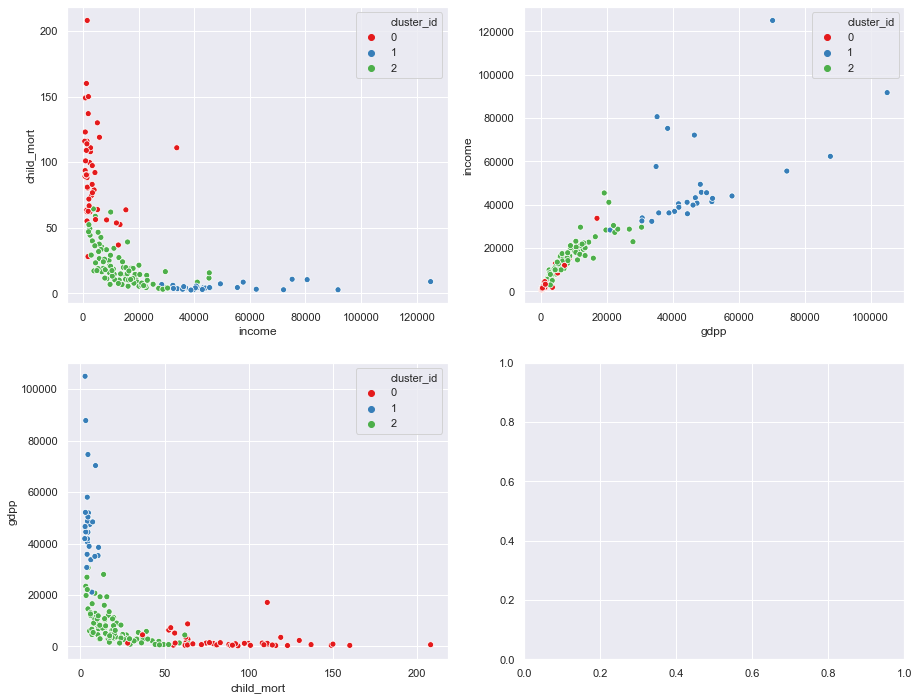

In [39]:
# Scatter plot on Original attributes to visualize the spread of the data

fig, axes = plt.subplots(2,2, figsize=(15,12))

sns.scatterplot(x = 'income', y = 'child_mort',hue='cluster_id',data = df_country,legend='full',palette="Set1",ax=axes[0][0])
sns.scatterplot(x = 'gdpp', y = 'income',hue='cluster_id', data = df_country,legend='full',palette="Set1",ax=axes[0][1])
sns.scatterplot(x = 'child_mort', y = 'gdpp',hue='cluster_id', data=df_country,legend='full',palette="Set1",ax=axes[1][0])
plt.show()

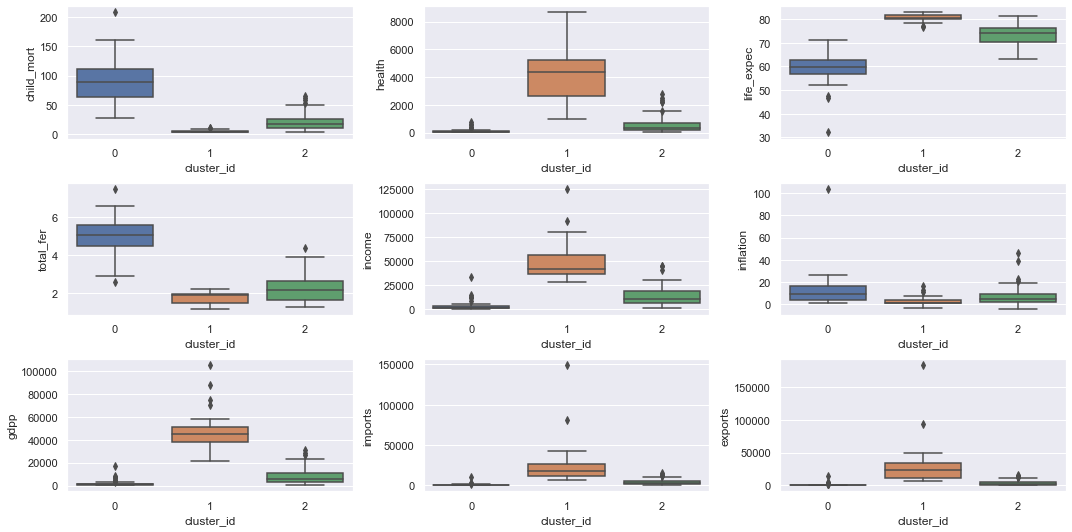

In [41]:
# Box plot on Original attributes to visualize the spread of the data

fig, axs = plt.subplots(3,3, figsize = (15,7.5))
plt1 = sns.boxplot(x='cluster_id', y = 'child_mort', data=df_country, ax = axs[0,0])
plt2 = sns.boxplot(x='cluster_id', y = 'health', data=df_country, ax = axs[0,1])
plt3 = sns.boxplot(x='cluster_id', y = 'life_expec', data=df_country, ax = axs[0,2])
plt4 = sns.boxplot(x='cluster_id', y = 'total_fer', data=df_country, ax = axs[1,0])
plt5 = sns.boxplot(x='cluster_id', y = 'income', data=df_country, ax = axs[1,1])
plt6 = sns.boxplot(x='cluster_id', y = 'inflation', data=df_country, ax = axs[1,2])
plt7 = sns.boxplot(x='cluster_id', y = 'gdpp', data=df_country, ax = axs[2,0])
plt8 = sns.boxplot(x='cluster_id', y = 'imports', data=df_country, ax = axs[2,1])
plt9 = sns.boxplot(x='cluster_id', y = 'exports', data=df_country, ax = axs[2,2])


plt.tight_layout()

 **Observations**
1. We can see a direct relation between the socioeconomic factors in the above boxplots
2. The cluster with highest income group has better health, highest gdpp, higher life expectancy, higher imports and exports, lowest child mortality, lower inflation rates and lower fertility rates.
3. While the countries with lower gdpp, imports and exports have lower income, higher child mortality, inflation and fertility.

- Cluster 1 are the better placed countries in terms of socio-economic status, health and development.
- **Cluster 0 countries would need help for development as this group forms highest child mortality, lowest gdpp and lowest income group.**

In [42]:
# List of countries that needed help

df_country['cluster_id'] = kmeans.labels_
cluster_0_kmeans = df_country[['cluster_id','country', 'child_mort', 'gdpp', 'income' ]].loc[df_country['cluster_id'] == 0].reset_index()
cluster_0_kmeans.shape

(48, 6)

#### There are 48 countries in cluster 2 which need help for development as per K-means Clustering

In [43]:
# List of countries in Cluster 0

cluster_0_kmeans.sort_values(by = ['child_mort', 'gdpp', 'income'], ascending = [False, True, True]).head(10)

,index,cluster_id,country,child_mort,gdpp,income
20,66,0,Haiti,208.0000,662,1500
38,132,0,Sierra Leone,160.0000,399,1220
8,32,0,Chad,150.0000,897,1930
7,31,0,Central African Republic,149.0000,446,888
29,97,0,Mali,137.0000,708,1870
34,113,0,Nigeria,130.0000,2330,5150
33,112,0,Niger,123.0000,348,814
1,3,0,Angola,119.0000,3530,5900
10,37,0,"Congo, Dem. Rep.",116.0000,334,609
4,25,0,Burkina Faso,116.0000,575,1430


<a id="prob"></a>
### <font color = "Purple" > Hierarchial Clustering
    
We use Hierarchial clusterign approach to identify appropriate cluster size with a good split in data
Max Intra-cluster distance and Min Inter-cluster distance


<a id="prob"></a>
### <font color = "Purple" > Single linkage
    
Here, the distance between 2 clusters is defined as the shortest distance between points in the two clusters.

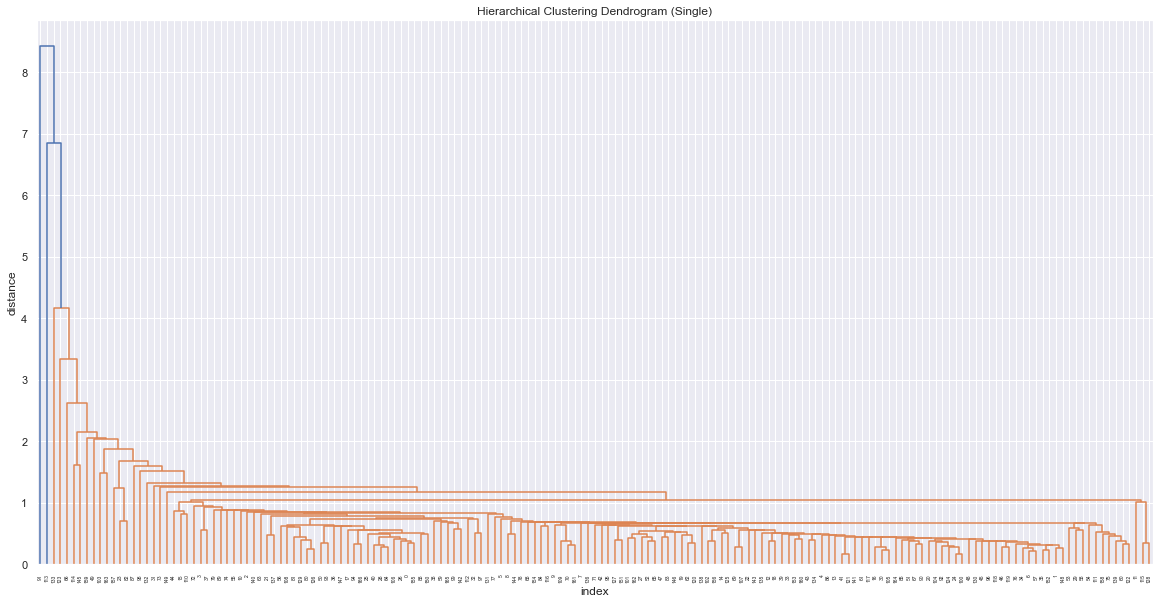

In [44]:
plt.figure(figsize=(20, 10))
plt.title('Hierarchical Clustering Dendrogram (Single)')
plt.xlabel('index')
plt.ylabel('distance')
merging_s = linkage(scaled_data, method="single", metric='euclidean')
dendrogram(merging_s)
plt.show()


<a id="prob"></a>
### <font color = "Purple" > complete linkage 
    
Here, the distance between 2 clusters is defined as the maximum distance between any 2 points in the clusters.

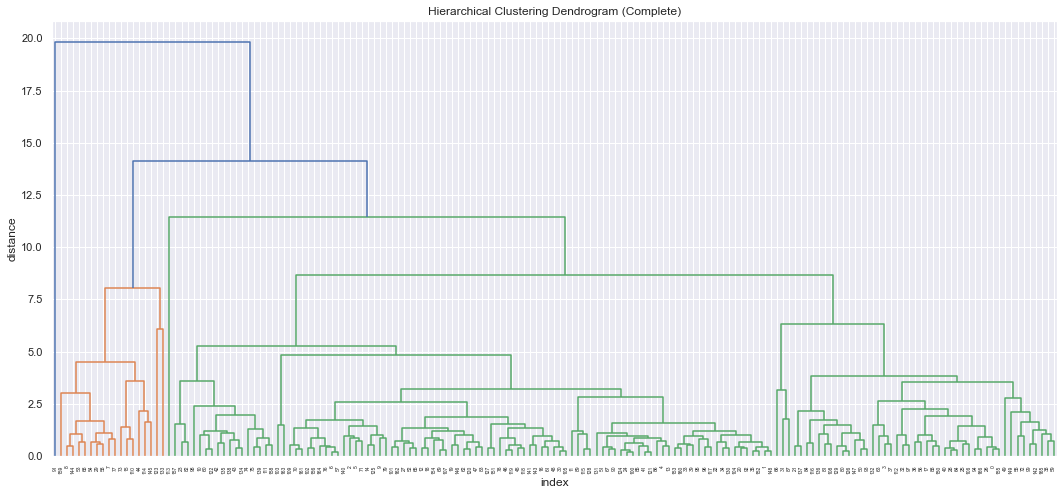

In [45]:
plt.figure(figsize=(18, 8))
plt.title('Hierarchical Clustering Dendrogram (Complete)')
plt.xlabel('index')
plt.ylabel('distance')
merging_c = linkage(scaled_data, method="complete", metric='euclidean')
dendrogram(merging_c)
plt.show()

#### NOTE
From the above two dendrograms, it is clear that Complete Linkage has a better cluster formation.
So, we will use Complete linkage output for further analysis. We will build two iterations of clustering
one with 3 clusters and another one with 4 clusters (based on the output from Complete Linkage Dendrogram) and analyze the output

In [46]:
df_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2000,55.3000,41.9174,248.2970,1610,9.4400,56.2000,5.8200,553,0
1,Albania,16.6000,1145.2000,267.8950,1987.7400,9930,4.4900,76.3000,1.6500,4090,2
2,Algeria,27.3000,1712.6400,185.9820,1400.4400,12900,16.1000,76.5000,2.8900,4460,2
3,Angola,119.0000,2199.1900,100.6050,1514.3700,5900,22.4000,60.1000,6.1600,3530,0
4,Antigua and Barbuda,10.3000,5551.0000,735.6600,7185.8000,19100,1.4400,76.8000,2.1300,12200,2


In [47]:
df_country_hc = df_country.drop('cluster_id',axis=1)
df_country_hc.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2000,55.3000,41.9174,248.2970,1610,9.4400,56.2000,5.8200,553
1,Albania,16.6000,1145.2000,267.8950,1987.7400,9930,4.4900,76.3000,1.6500,4090
2,Algeria,27.3000,1712.6400,185.9820,1400.4400,12900,16.1000,76.5000,2.8900,4460
3,Angola,119.0000,2199.1900,100.6050,1514.3700,5900,22.4000,60.1000,6.1600,3530
4,Antigua and Barbuda,10.3000,5551.0000,735.6600,7185.8000,19100,1.4400,76.8000,2.1300,12200


### First iteration k=3

In [48]:
# Let cut the tree at height of approx 3 clusters and see if it get any better cluster formation.

cluster_labels= cut_tree(merging_c, n_clusters = 3).reshape(-1,)
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [49]:
# creating a dataframe with cluster labels on it

df_country_hc['cluster_labels'] = cluster_labels
df_country_hc.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Afghanistan,90.2000,55.3000,41.9174,248.2970,1610,9.4400,56.2000,5.8200,553,0
1,Albania,16.6000,1145.2000,267.8950,1987.7400,9930,4.4900,76.3000,1.6500,4090,0
2,Algeria,27.3000,1712.6400,185.9820,1400.4400,12900,16.1000,76.5000,2.8900,4460,0
3,Angola,119.0000,2199.1900,100.6050,1514.3700,5900,22.4000,60.1000,6.1600,3530,0
4,Antigua and Barbuda,10.3000,5551.0000,735.6600,7185.8000,19100,1.4400,76.8000,2.1300,12200,0


In [52]:
df_country_hc.cluster_labels.value_counts()

0    148
1    18 
2    1  
Name: cluster_labels, dtype: int64

In [54]:
data['cluster_labels'] = cluster_labels
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,90.2000,12.1200,7.5800,44.9000,1610.0000,9.4400,56.2000,5.8200,553.0000,0
1,16.6000,28.0000,6.5500,48.6000,9930.0000,4.4900,76.3000,1.6500,4090.0000,0
2,27.3000,38.4000,4.1700,31.4000,12900.0000,16.1000,76.5000,2.8900,4460.0000,0
3,116.0000,62.3000,2.8500,42.9000,5900.0000,20.8700,60.1000,5.8610,3530.0000,0
4,10.3000,45.5000,6.0300,58.9000,19100.0000,1.4400,76.8000,2.1300,12200.0000,0


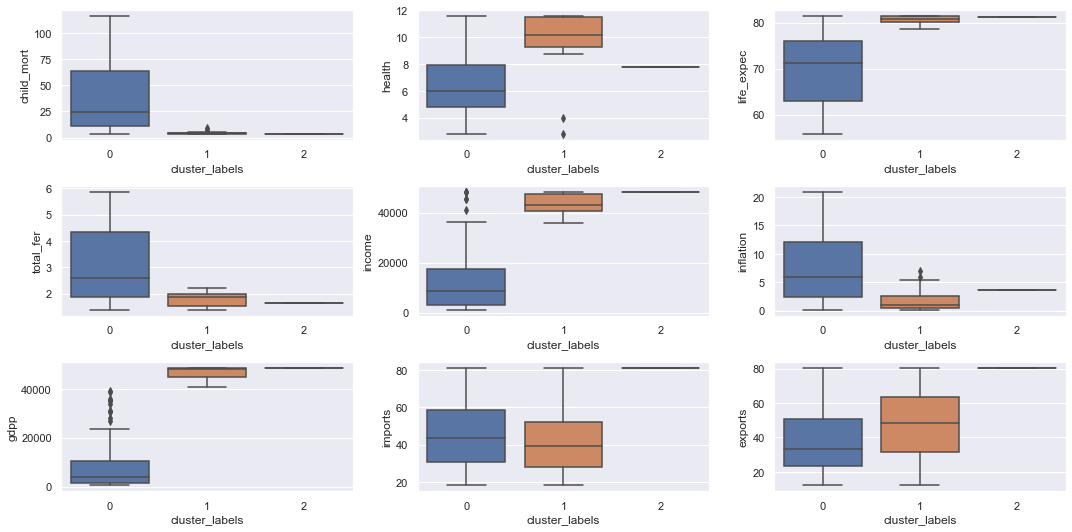

In [55]:
# Box plot on various features against the CLUSTER_ID to visualize the spread of the data

# plots
fig, axs = plt.subplots(3,3, figsize = (15,7.5))
plt1 = sns.boxplot(x='cluster_labels', y = 'child_mort', data=data, ax = axs[0,0])
plt2 = sns.boxplot(x='cluster_labels', y = 'health', data=data, ax = axs[0,1])
plt3 = sns.boxplot(x='cluster_labels', y = 'life_expec', data=data, ax = axs[0,2])
plt4 = sns.boxplot(x='cluster_labels', y = 'total_fer', data=data, ax = axs[1,0])
plt5 = sns.boxplot(x='cluster_labels', y = 'income', data=data, ax = axs[1,1])
plt6 = sns.boxplot(x='cluster_labels', y = 'inflation', data=data, ax = axs[1,2])
plt7 = sns.boxplot(x='cluster_labels', y = 'gdpp', data=data, ax = axs[2,0])
plt8 = sns.boxplot(x='cluster_labels', y = 'imports', data=data, ax = axs[2,1])
plt9 = sns.boxplot(x='cluster_labels', y = 'exports', data=data, ax = axs[2,2])


plt.tight_layout()

 **Observations**
- Here cluster 2 forms the better placed countries in terms of socio-economic status and Cluster 0 is a group of countries which would need help with lowest gdpp, income and highest child mortality rates.

In [57]:
df_country['cluster_labels'] = cluster_labels
cluster_0_hc = df_country[['cluster_labels','country', 'child_mort', 'gdpp', 'income' ]].loc[df_country['cluster_labels'] == 0].reset_index()
cluster_0_hc.shape

(148, 6)

In [58]:
cluster_0_hc.sort_values(by = ['child_mort', 'gdpp', 'income'], ascending = [False, True, True]).head(10)

,index,cluster_labels,country,child_mort,gdpp,income
58,66,0,Haiti,208.0000,662,1500
117,132,0,Sierra Leone,160.0000,399,1220
28,32,0,Chad,150.0000,897,1930
27,31,0,Central African Republic,149.0000,446,888
85,97,0,Mali,137.0000,708,1870
100,113,0,Nigeria,130.0000,2330,5150
99,112,0,Niger,123.0000,348,814
3,3,0,Angola,119.0000,3530,5900
33,37,0,"Congo, Dem. Rep.",116.0000,334,609
22,25,0,Burkina Faso,116.0000,575,1430


<a id="prob"></a>
# <font color = "Purple" > Conclusion

 <a id="prob"></a>
# <font color = "Purple" > Final list of countries that NGO should focus upon:

<a id="prob"></a>
#### <font color = "sky blue" > We can see that both K means and Hierarchical clustering with K=3 gave us similar results. We are able to group the countries which we can provide to HELP international CEO to focus on the most.

- There are 43-148 backward countries which HELP international CEO should target to focus on.

**Top 5 of those are:
1. Haiti
2. Sierra Leone
3. Chad
4. Central African Republic
5. Mali**
6. Nigeria
7. Niger
8. Angola
9. Congo,Dem.Rep
10. Burkina Faso

among other African countries.